In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('./drive/My Drive/imdb_top_1000.csv')

In [4]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.shape

(1000, 16)

**Calculating the Mean Vote**


In [8]:
meanvote = df['No_of_Votes'].mean()
print(meanvote)

273692.911


**Calculating the cutoff vale (minimum votes)**

In [9]:
minimumvote =df['No_of_Votes'].quantile(0.90)
print(minimumvote)

699297.7


**Filter the movies into another dataframe**

In [10]:
q_movies = df.copy().loc[df['No_of_Votes']>=minimumvote]
q_movies.shape

(100, 16)

In [11]:
def weighted_rating(x,minimumvote=minimumvote,meanvote=meanvote):
    voters = x['No_of_Votes']
    return(voters/(voters+minimumvote)) + (minimumvote/(minimumvote+voters) * meanvote)

In [12]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [13]:
q_movies = q_movies.sort_values('score',ascending=False)

In [14]:
pd.set_option('precision',2)

In [15]:
q_movies[['Series_Title','No_of_Votes','score']].head(20)

,Series_Title,No_of_Votes,score
355,Black Swan,699673,136810.24
95,Amélie,703810,136406.87
343,The Revenant,705589,136234.14
209,The Grand Budapest Hotel,707630,136036.51
750,The Hangover,717559,135083.20
34,Whiplash,717585,135080.72
225,Gran Torino,720450,134808.14
111,Taxi Driver,724636,134411.84
38,The Pianist,729603,133944.61
252,The Big Lebowski,732620,133662.40


**Top Rated Movie Title**

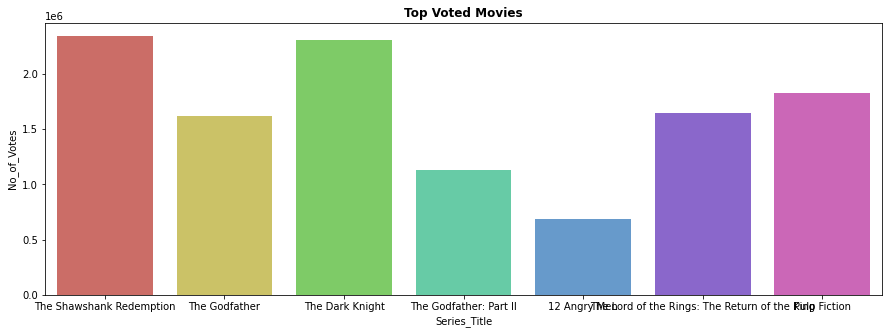

In [16]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=df['Series_Title'][:7],y=df['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

**Top Rated Movie Rating**

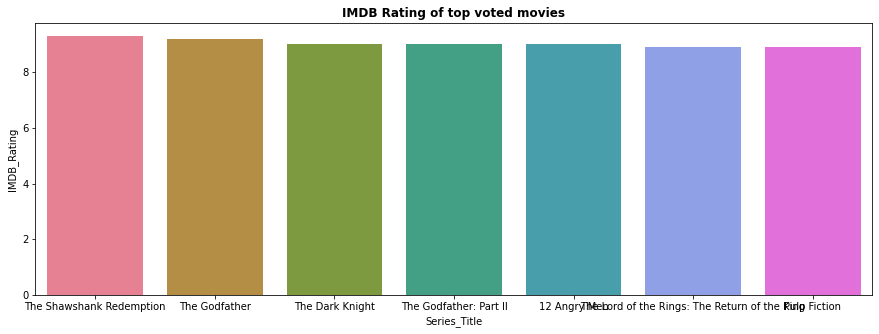

In [17]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=df['Series_Title'][:7],y=df['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

**Top Rated MetaScore**

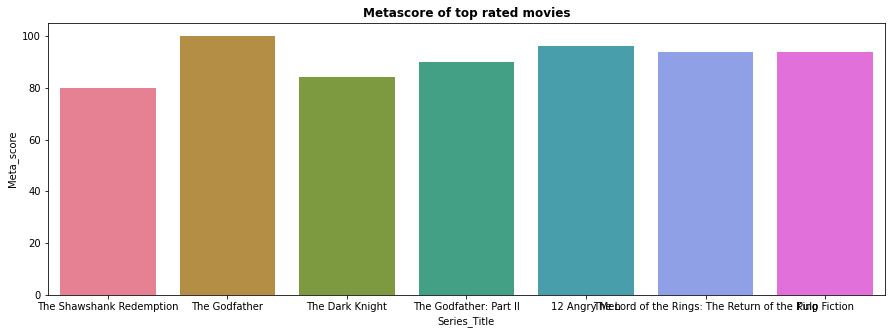

In [18]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=df['Series_Title'][:7],y=df['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [19]:
df['Gross'].head(5)

0     28,341,469
1    134,966,411
2    534,858,444
3     57,300,000
4      4,360,000
Name: Gross, dtype: object

In [20]:
df.loc[df['Gross']==0]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


**Gross of Top Rated movies**

**Maximun Movies Realeased in**

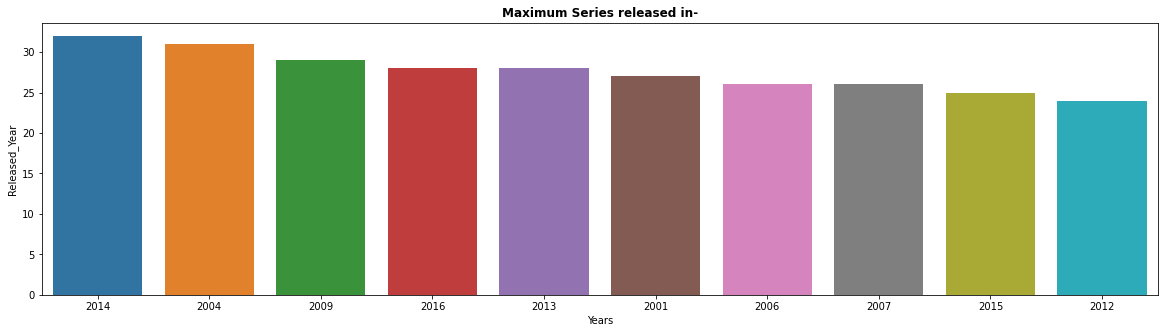

In [24]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=df['Released_Year'].value_counts()[:10].index,y=df['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

**Directors with respect to Gross of the Movies**

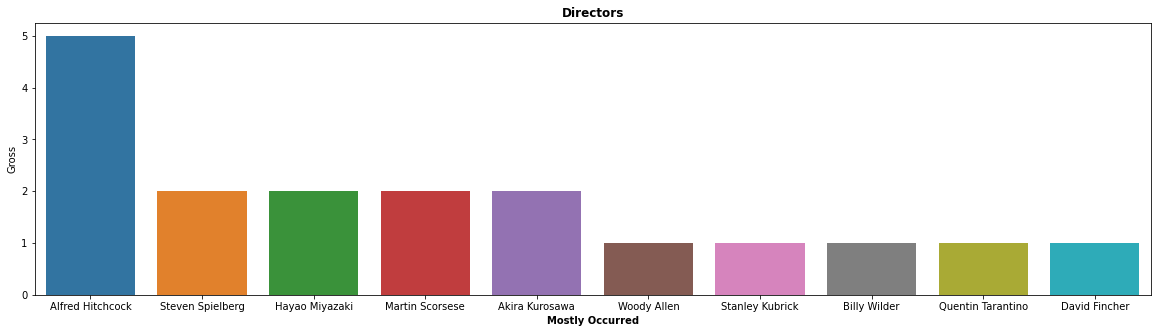

In [25]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=df['Director'].value_counts()[:10].index,y=df['Gross'].value_counts()[:10])
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

**Top 10 Genres**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


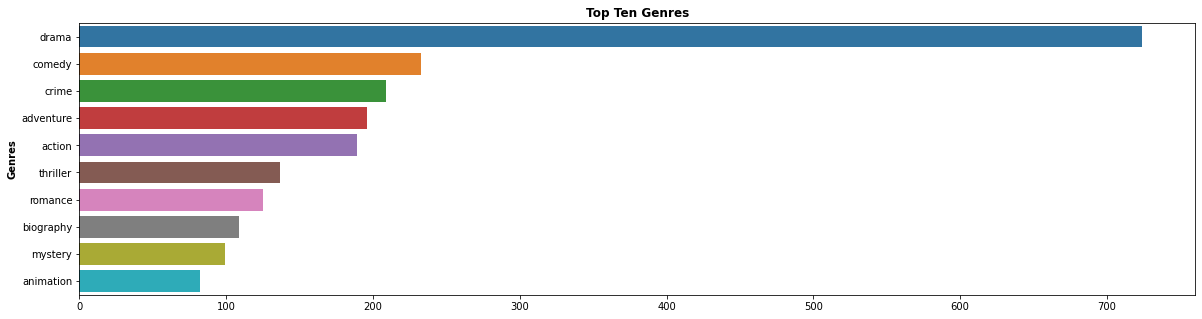

In [27]:
from collections import Counter
genre=[]
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count=Counter(genre)
count=count.most_common()[:10]
x,y=map(list,zip(*count))

fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top Ten Genres", weight = "bold")
plt.show()